In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [2]:
lfd_data = pd.read_excel('lfd_group15.xlsx')

In [3]:
#Checking for null values
lfd_data.isnull().sum()

width_cm        0
length          0
frequency       0
country         0
price           0
elasticity      0
humidity        0
y_offset      252
shape           0
distance        0
target          0
dtype: int64

In [4]:
lfd_data

,width_cm,length,frequency,country,price,elasticity,humidity,y_offset,shape,distance,target
0,170,131,764,Belgium,671,46.83,46.10,-57.11,cuboid,44.40,widget3
1,201,132,744,Italy,1077,32.64,29.76,93.74,oblong,21.40,widget2
2,106,116,587,Japan,1020,57.32,63.23,-86.23,cuboid,46.72,widget6
3,153,113,475,Belgium,819,47.77,37.54,-54.01,cylinder,50.22,widget3
4,157,94,709,Belgium,919,42.76,68.88,-61.58,cuboid,47.74,widget5
...,...,...,...,...,...,...,...,...,...,...,...
4995,119,103,428,China,1186,74.07,49.63,128.74,cuboid,44.35,widget1
4996,185,115,495,South Korea,807,58.82,60.37,39.84,cylinder,51.73,widget3
4997,143,136,573,Japan,735,26.37,54.14,32.56,cuboid,48.60,widget3
4998,169,121,527,Italy,826,64.75,35.11,108.49,cuboid,45.85,widget1


In [5]:
#Only y_offset had null values, so replacing them with mean value 
lfd_data['y_offset'].fillna(-1.912342,inplace=True)

# Data Cleaning

In [6]:
#one hot encoding the column country as we had to categorise countrys into multiple columns
one_hot = pd.get_dummies(lfd_data['country'])

In [7]:
#drop the column country
lfd_data = lfd_data.drop('country', axis = 1)

In [8]:
#append the one_hot object into main data set
lfd_data = lfd_data.join(one_hot)
lfd_data

,width_cm,length,frequency,price,elasticity,humidity,y_offset,shape,distance,target,...,China,France,Germany,India,Italy,Japan,Russia,South Korea,United Kingdom,United States
0,170,131,764,671,46.83,46.10,-57.11,cuboid,44.40,widget3,...,False,False,False,False,False,False,False,False,False,False
1,201,132,744,1077,32.64,29.76,93.74,oblong,21.40,widget2,...,False,False,False,False,True,False,False,False,False,False
2,106,116,587,1020,57.32,63.23,-86.23,cuboid,46.72,widget6,...,False,False,False,False,False,True,False,False,False,False
3,153,113,475,819,47.77,37.54,-54.01,cylinder,50.22,widget3,...,False,False,False,False,False,False,False,False,False,False
4,157,94,709,919,42.76,68.88,-61.58,cuboid,47.74,widget5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,119,103,428,1186,74.07,49.63,128.74,cuboid,44.35,widget1,...,True,False,False,False,False,False,False,False,False,False
4996,185,115,495,807,58.82,60.37,39.84,cylinder,51.73,widget3,...,False,False,False,False,False,False,False,True,False,False
4997,143,136,573,735,26.37,54.14,32.56,cuboid,48.60,widget3,...,False,False,False,False,False,True,False,False,False,False
4998,169,121,527,826,64.75,35.11,108.49,cuboid,45.85,widget1,...,False,False,False,False,True,False,False,False,False,False


In [9]:
# we will do the same thing for the column shape
#one hot encoding
one_hot1 = pd.get_dummies(lfd_data['shape'])

In [10]:
one_hot1

,cuboid,cylinder,oblong,other,spherical
0,True,False,False,False,False
1,False,False,True,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
4995,True,False,False,False,False
4996,False,True,False,False,False
4997,True,False,False,False,False
4998,True,False,False,False,False


In [11]:

lfd_data = lfd_data.drop('shape', axis = 1)

In [12]:
#append the one hot enoded object to the main data frame
lfd_data = lfd_data.join(one_hot1)
lfd_data

,width_cm,length,frequency,price,elasticity,humidity,y_offset,distance,target,Belgium,...,Japan,Russia,South Korea,United Kingdom,United States,cuboid,cylinder,oblong,other,spherical
0,170,131,764,671,46.83,46.10,-57.11,44.40,widget3,True,...,False,False,False,False,False,True,False,False,False,False
1,201,132,744,1077,32.64,29.76,93.74,21.40,widget2,False,...,False,False,False,False,False,False,False,True,False,False
2,106,116,587,1020,57.32,63.23,-86.23,46.72,widget6,False,...,True,False,False,False,False,True,False,False,False,False
3,153,113,475,819,47.77,37.54,-54.01,50.22,widget3,True,...,False,False,False,False,False,False,True,False,False,False
4,157,94,709,919,42.76,68.88,-61.58,47.74,widget5,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,119,103,428,1186,74.07,49.63,128.74,44.35,widget1,False,...,False,False,False,False,False,True,False,False,False,False
4996,185,115,495,807,58.82,60.37,39.84,51.73,widget3,False,...,False,False,True,False,False,False,True,False,False,False
4997,143,136,573,735,26.37,54.14,32.56,48.60,widget3,False,...,True,False,False,False,False,True,False,False,False,False
4998,169,121,527,826,64.75,35.11,108.49,45.85,widget1,False,...,False,False,False,False,False,True,False,False,False,False


In [13]:
lfd_data_name = list(lfd_data.columns)
lfd_data_name

['width_cm',
 'length',
 'frequency',
 'price',
 'elasticity',
 'humidity',
 'y_offset',
 'distance',
 'target',
 'Belgium',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'United States',
 'cuboid',
 'cylinder',
 'oblong',
 'other',
 'spherical']

In [14]:
#we shall order the columns so that its easier to divide them
# we reshuffle the clumn names by moving the target column to the end
lfd_data = lfd_data[['width_cm',
 'length',
 'frequency',
 'price',
 'elasticity',
 'humidity',
 'y_offset',
 'distance',
 'Belgium',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'United States',
 'cuboid',
 'cylinder',
 'oblong',
 'other',
 'spherical',
 'target']]

In [15]:
#Updating the reshuffled column names on the data frame 
## VERY VERY IMPORTANT
lfd_data_name = list(lfd_data.columns)
lfd_data_name

['width_cm',
 'length',
 'frequency',
 'price',
 'elasticity',
 'humidity',
 'y_offset',
 'distance',
 'Belgium',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'United States',
 'cuboid',
 'cylinder',
 'oblong',
 'other',
 'spherical',
 'target']

In [16]:
#Checking cleaned data 
lfd_data

,width_cm,length,frequency,price,elasticity,humidity,y_offset,distance,Belgium,China,...,Russia,South Korea,United Kingdom,United States,cuboid,cylinder,oblong,other,spherical,target
0,170,131,764,671,46.83,46.10,-57.11,44.40,True,False,...,False,False,False,False,True,False,False,False,False,widget3
1,201,132,744,1077,32.64,29.76,93.74,21.40,False,False,...,False,False,False,False,False,False,True,False,False,widget2
2,106,116,587,1020,57.32,63.23,-86.23,46.72,False,False,...,False,False,False,False,True,False,False,False,False,widget6
3,153,113,475,819,47.77,37.54,-54.01,50.22,True,False,...,False,False,False,False,False,True,False,False,False,widget3
4,157,94,709,919,42.76,68.88,-61.58,47.74,True,False,...,False,False,False,False,True,False,False,False,False,widget5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,119,103,428,1186,74.07,49.63,128.74,44.35,False,True,...,False,False,False,False,True,False,False,False,False,widget1
4996,185,115,495,807,58.82,60.37,39.84,51.73,False,False,...,False,True,False,False,False,True,False,False,False,widget3
4997,143,136,573,735,26.37,54.14,32.56,48.60,False,False,...,False,False,False,False,True,False,False,False,False,widget3
4998,169,121,527,826,64.75,35.11,108.49,45.85,False,False,...,False,False,False,False,True,False,False,False,False,widget1



# Visualization

<Axes: xlabel='price', ylabel='Count'>

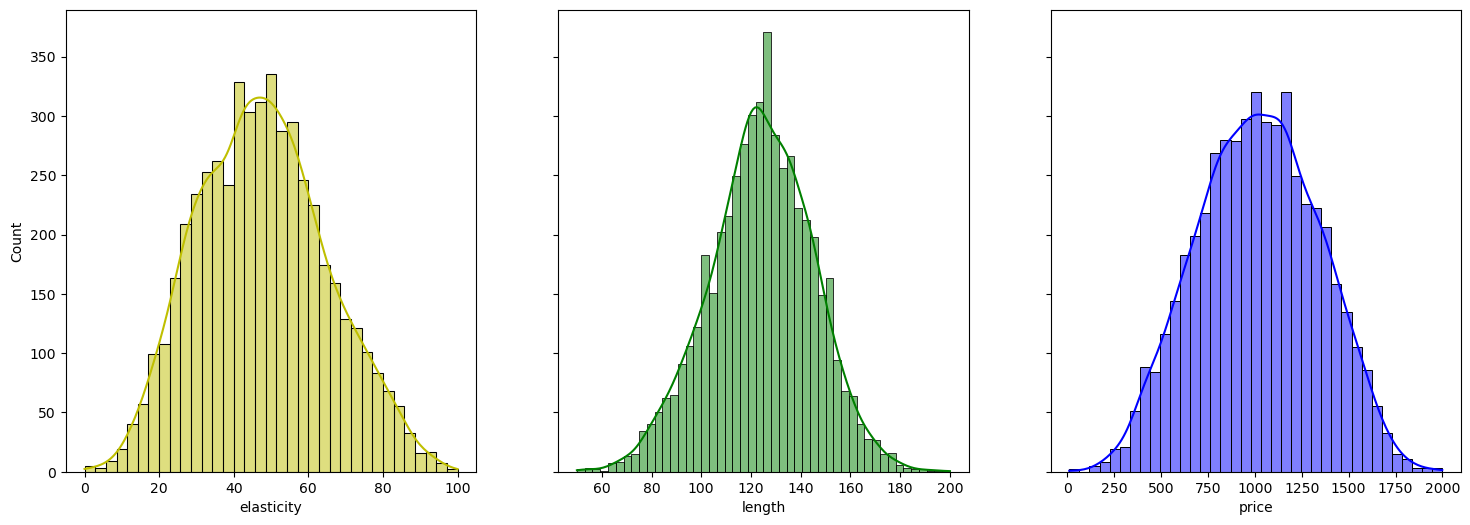

In [17]:
#checking the distribution of our variables that satisfy the normal distribution as per NB

fig,axes = plt.subplots(1,3,figsize=(18,6),sharey= True)
sns.histplot(lfd_data,ax=axes[0],x="elasticity", kde = True , color = 'y')
sns.histplot(lfd_data,ax=axes[1],x="length", kde = True , color = 'g')
sns.histplot(lfd_data,ax=axes[2],x="price", kde = True , color = 'b')







E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


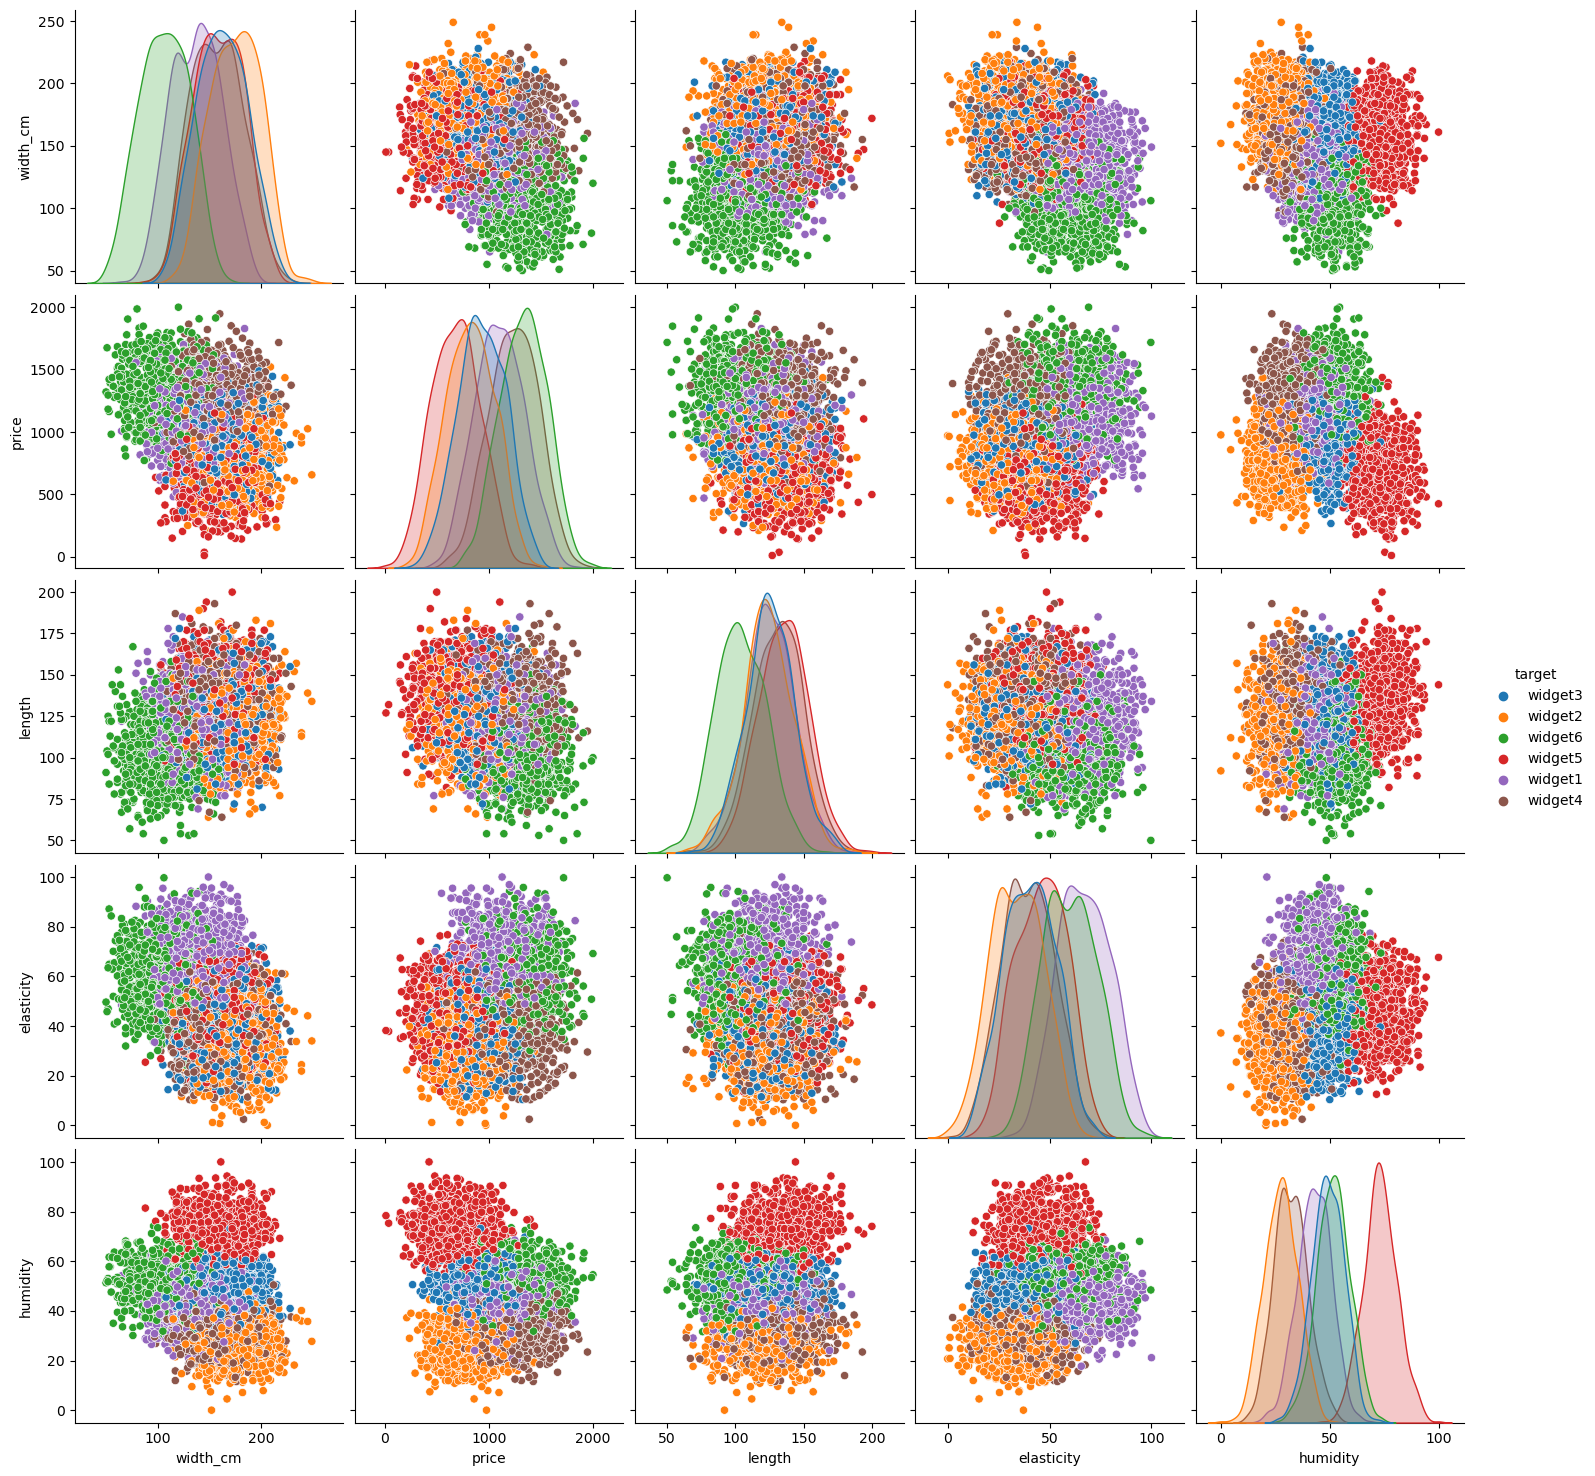

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


##choosing some of our variables for visualziation
variables_1 = ['width_cm', 'price', 'length', 'elasticity', 'humidity']

# Change 'lfd_data' to your dataset with imputed data but with the 'target' column
sns.pairplot(lfd_data, hue='target', vars=variables_1, height = 3);

plt.style.use('classic')
%matplotlib inline



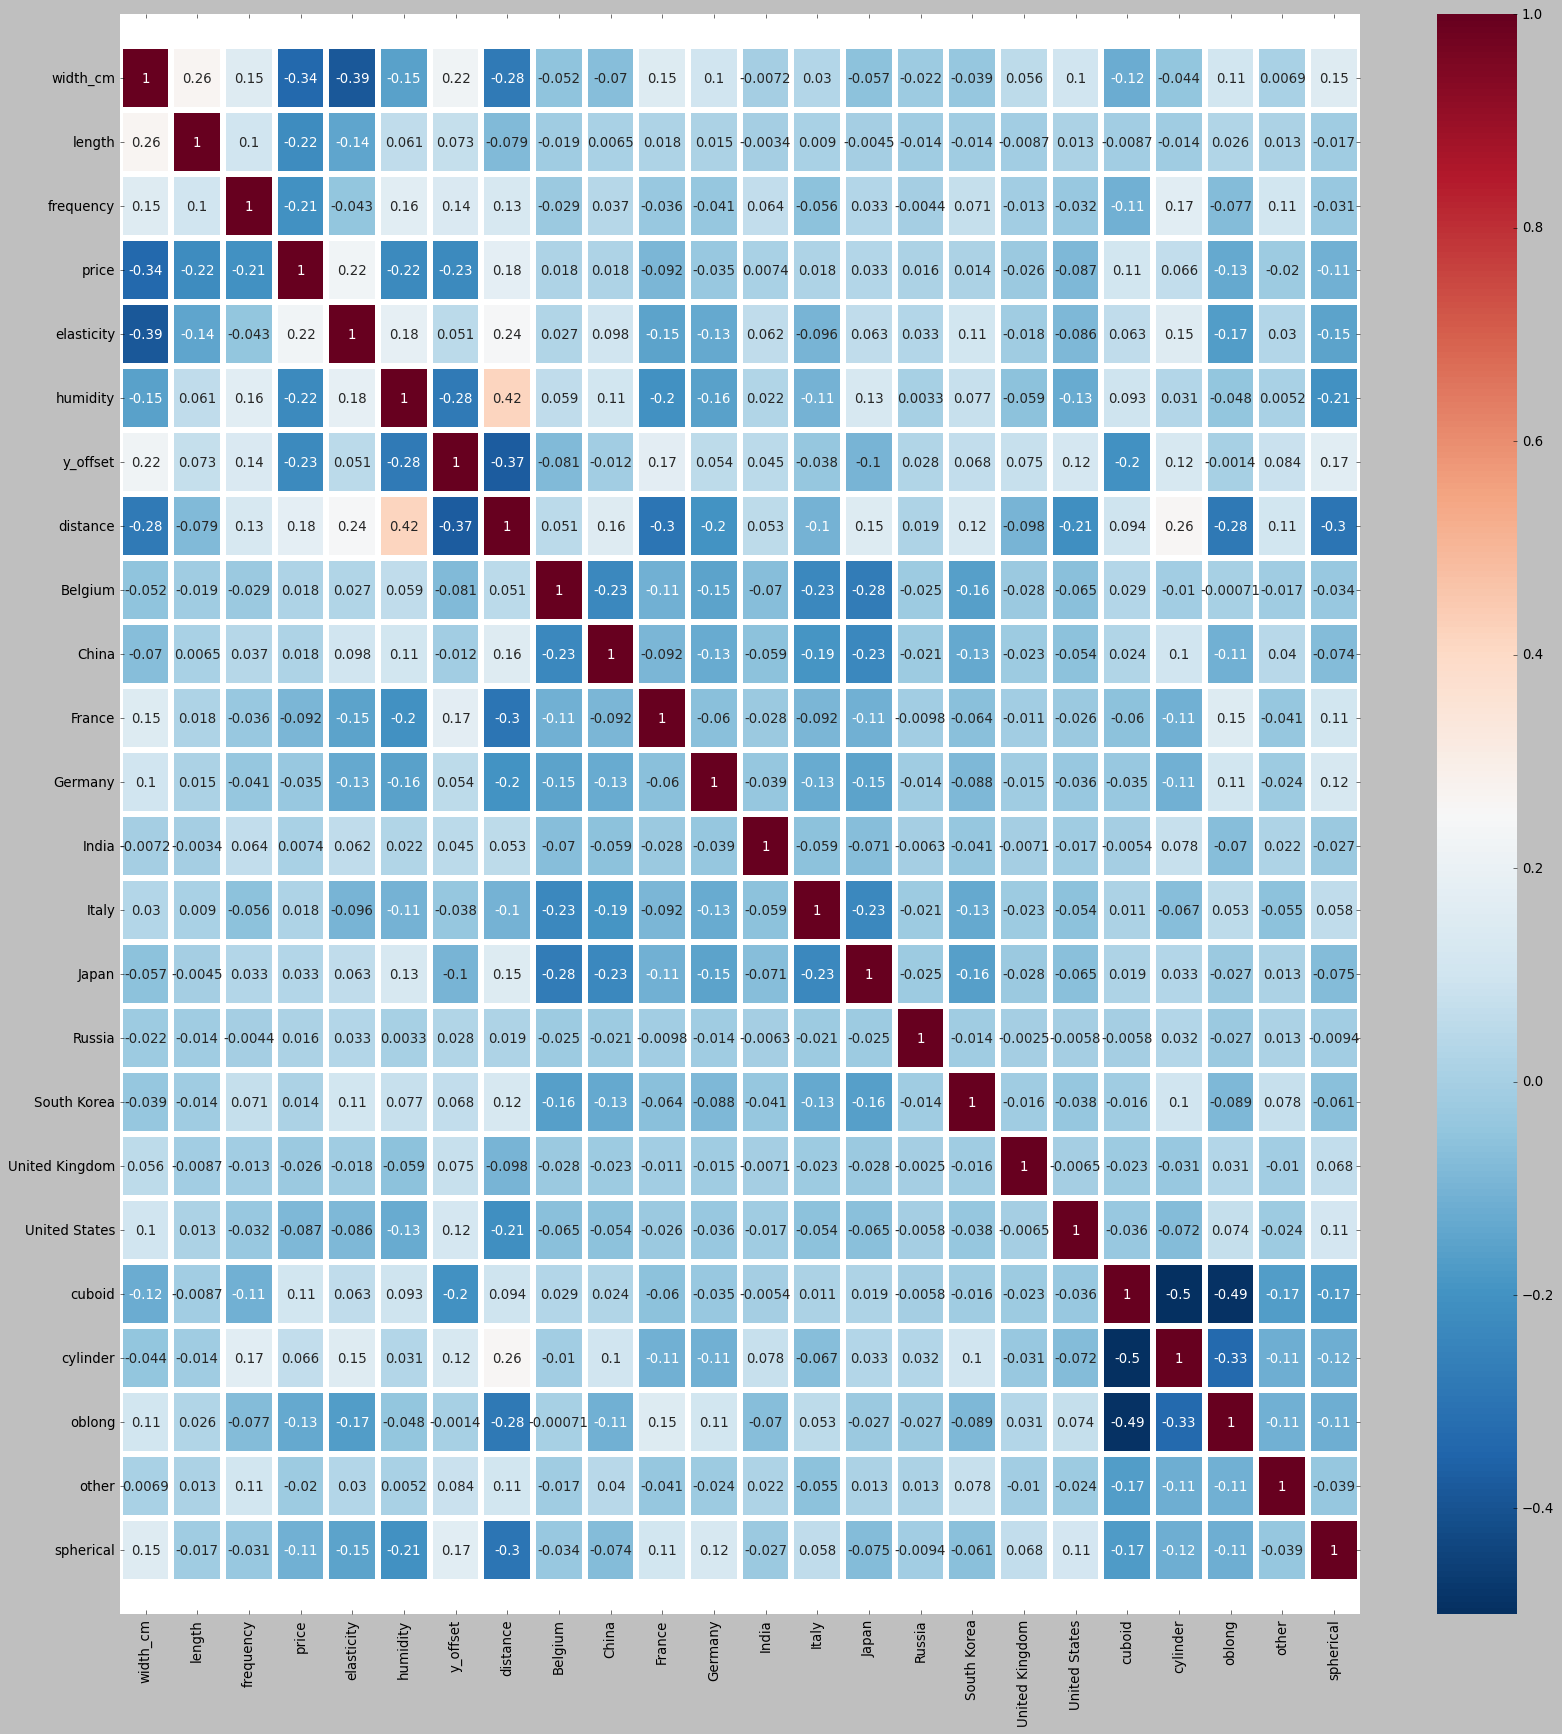

In [19]:
#  interpreting how variables are correlated to the target variable

import matplotlib.pyplot as plt
import seaborn as sns

X = lfd_data[lfd_data_name[0:24]]
Y = lfd_data[lfd_data_name[24]]

#correlation matrix

corr_matrix=X.corr(method='pearson')




#specifying size of heathmap
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix,annot=True,cmap='RdBu_r',linewidths=5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

[2 1 5 ... 2 0 2]
      width_cm  length  frequency  price  elasticity  humidity  y_offset  \
0          170     131        764    671       46.83     46.10    -57.11   
1          201     132        744   1077       32.64     29.76     93.74   
2          106     116        587   1020       57.32     63.23    -86.23   
3          153     113        475    819       47.77     37.54    -54.01   
4          157      94        709    919       42.76     68.88    -61.58   
...        ...     ...        ...    ...         ...       ...       ...   
4995       119     103        428   1186       74.07     49.63    128.74   
4996       185     115        495    807       58.82     60.37     39.84   
4997       143     136        573    735       26.37     54.14     32.56   
4998       169     121        527    826       64.75     35.11    108.49   
4999       155     118        514    702       48.73     54.47      6.66   

      distance  Belgium  China  ...  Russia  South Korea  United King

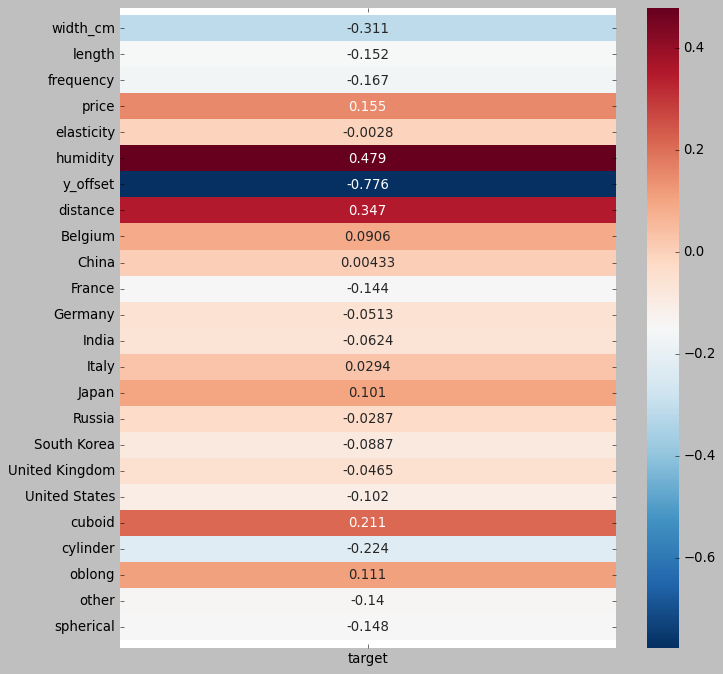

In [20]:



##adding a heatmap to get better visualization of the correlation between dependent and independet variable

X = lfd_data[lfd_data_name[0:24]]
Y = lfd_data[lfd_data_name[24]]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create copy of `X` for encoded version
y_enc = Y.copy()
y_enc = le.fit_transform(Y)
print(y_enc)


x_y=X.copy()
x_y["target"]=y_enc
print(x_y)

corr_matrix2=x_y.corr(method='pearson')
corr_matrix2


corr_target1 = corr_matrix2[["target"]].drop(labels=["target"])
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_target1, annot=True, fmt='.3', cmap='RdBu_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.3, top - 0.3)
plt.show()

# Model Training 

In [21]:
X = lfd_data[lfd_data_name[0:24]]
Y = lfd_data[lfd_data_name[24]]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,
                                                   random_state=0,
                                                   stratify=lfd_data['target'])

In [22]:
X_train.head()

,width_cm,length,frequency,price,elasticity,humidity,y_offset,distance,Belgium,China,...,Japan,Russia,South Korea,United Kingdom,United States,cuboid,cylinder,oblong,other,spherical
1389,122,99,449,825,42.39,57.32,29.19,46.88,False,False,...,False,False,False,False,False,False,True,False,False,False
447,136,164,727,733,24.29,52.22,28.78,57.56,False,False,...,True,False,False,False,False,True,False,False,False,False
3169,103,121,450,1449,91.09,47.73,154.96,39.22,False,True,...,False,False,False,False,False,False,True,False,False,False
741,160,142,449,393,64.58,81.80,-47.03,48.87,True,False,...,False,False,False,False,False,True,False,False,False,False
2515,166,110,493,638,45.63,37.16,13.57,46.44,False,False,...,False,True,False,False,False,True,False,False,False,False


In [23]:
y_train.head()

1389    widget3
447     widget3
3169    widget1
741     widget5
2515    widget3
Name: target, dtype: object

In [24]:
df = (lfd_data)
x= df[['width_cm',
 'length',
 'frequency',
 'price',
 'elasticity',
 'humidity',
 'y_offset',
 'distance',
 'Belgium',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'United States',
 'cuboid',
 'cylinder',
 'oblong',
 'other',
 'spherical']]

y = df [['target']]

df

,width_cm,length,frequency,price,elasticity,humidity,y_offset,distance,Belgium,China,...,Russia,South Korea,United Kingdom,United States,cuboid,cylinder,oblong,other,spherical,target
0,170,131,764,671,46.83,46.10,-57.11,44.40,True,False,...,False,False,False,False,True,False,False,False,False,widget3
1,201,132,744,1077,32.64,29.76,93.74,21.40,False,False,...,False,False,False,False,False,False,True,False,False,widget2
2,106,116,587,1020,57.32,63.23,-86.23,46.72,False,False,...,False,False,False,False,True,False,False,False,False,widget6
3,153,113,475,819,47.77,37.54,-54.01,50.22,True,False,...,False,False,False,False,False,True,False,False,False,widget3
4,157,94,709,919,42.76,68.88,-61.58,47.74,True,False,...,False,False,False,False,True,False,False,False,False,widget5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,119,103,428,1186,74.07,49.63,128.74,44.35,False,True,...,False,False,False,False,True,False,False,False,False,widget1
4996,185,115,495,807,58.82,60.37,39.84,51.73,False,False,...,False,True,False,False,False,True,False,False,False,widget3
4997,143,136,573,735,26.37,54.14,32.56,48.60,False,False,...,False,False,False,False,True,False,False,False,False,widget3
4998,169,121,527,826,64.75,35.11,108.49,45.85,False,False,...,False,False,False,False,True,False,False,False,False,widget1


In [25]:
import time

X = lfd_data[lfd_data_name[0:24]]
Y = lfd_data[lfd_data_name[24]]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,
                                                   random_state=0,
                                                   stratify=lfd_data['target'])

start_time = time.time()


df = (lfd_data)
x= df[['width_cm',
 'length',
 'frequency',
 'price',
 'elasticity',
 'humidity',
 'y_offset',
 'distance',
 'Belgium',
 'China',
 'France',
 'Germany',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'United Kingdom',
 'United States',
 'cuboid',
 'cylinder',
 'oblong',
 'other',
 'spherical']]

y = df [['target']]



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

clf=GaussianNB()
clf.fit(X_train,y_train)
training_time = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time:.3f} seconds")


y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


pred=clf.predict(X_test)
pred


clf.score(X_test,y_test)






Training Time: 0.034 seconds
              precision    recall  f1-score   support

     widget1       0.95      0.92      0.94       198
     widget2       0.96      0.98      0.97       198
     widget3       0.75      0.96      0.84       197
     widget4       0.92      0.89      0.91       242
     widget5       0.96      0.90      0.93       204
     widget6       0.98      0.82      0.90       211

    accuracy                           0.91      1250
   macro avg       0.92      0.91      0.91      1250
weighted avg       0.92      0.91      0.91      1250



E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9112

In [26]:
clf=GaussianNB()
clf.fit(X_train,y_train)

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [27]:
y_pred=clf.predict(X_test)
pred

array(['widget6', 'widget3', 'widget3', ..., 'widget2', 'widget5',
       'widget4'], dtype='<U7')

In [28]:
clf.score(X_test,y_test)


0.9112

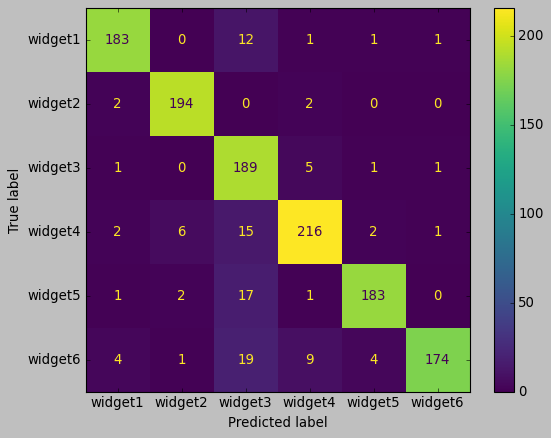

In [29]:
## CONFUSION MATRIX
# to check for model prediction

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, y_pred, labels=["widget1","widget2","widget3","widget4","widget5","widget6"])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["widget1","widget2","widget3","widget4","widget5","widget6"])
disp.plot()




In [30]:
df['target'].value_counts()

##

target
widget2    834
widget1    834
widget3    833
widget6    833
widget5    833
widget4    833
Name: count, dtype: int64

In [31]:
###

#converting target variable into numeric for filtering
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create copy of `X` for encoded version
y_enc = y.copy()
y_enc = le.fit_transform(y)
print(y_enc)



[2 1 5 ... 2 0 2]


E:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


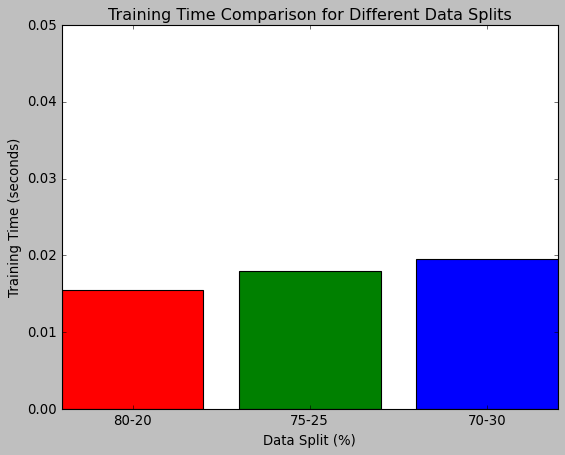

In [32]:
import matplotlib.pyplot as plt

# Data
x_labels = ['80-20', '75-25', '70-30']
training_times = [0.0155, 0.018, 0.0195]  # Manually input the training times in seconds recorded from previous results

# Create a bar graph
plt.bar(x_labels, training_times, color=['red', 'green', 'blue'])

# Set labels and title
plt.xlabel('Data Split (%)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison for Different Data Splits')

# Set Y-axis limits
plt.ylim(0, 0.05)

# Show the plot
plt.show()


In [33]:
#none of the features are highly correlated together, we could also check each features correlation with target variable 
#& rank accordingly
#if a feature is not very correlated with the target variable,
#then it may not be very predictive and can potentially be filtered out.


x_y=x.copy()
x_y["target"]=y_enc
print(x_y)

corr_matrix2=x_y.corr(method='pearson')
corr_matrix2

      width_cm  length  frequency  price  elasticity  humidity  y_offset  \
0          170     131        764    671       46.83     46.10    -57.11   
1          201     132        744   1077       32.64     29.76     93.74   
2          106     116        587   1020       57.32     63.23    -86.23   
3          153     113        475    819       47.77     37.54    -54.01   
4          157      94        709    919       42.76     68.88    -61.58   
...        ...     ...        ...    ...         ...       ...       ...   
4995       119     103        428   1186       74.07     49.63    128.74   
4996       185     115        495    807       58.82     60.37     39.84   
4997       143     136        573    735       26.37     54.14     32.56   
4998       169     121        527    826       64.75     35.11    108.49   
4999       155     118        514    702       48.73     54.47      6.66   

      distance  Belgium  China  ...  Russia  South Korea  United Kingdom  \
0        44

,width_cm,length,frequency,price,elasticity,humidity,y_offset,distance,Belgium,China,...,Russia,South Korea,United Kingdom,United States,cuboid,cylinder,oblong,other,spherical,target
width_cm,1.000000,0.264723,0.151919,-0.338899,-0.386600,-0.154515,0.218564,-0.277195,-0.051714,-0.070257,...,-0.021601,-0.039100,0.056479,0.100721,-0.118644,-0.044111,0.108672,0.006904,0.153990,-0.311274
length,0.264723,1.000000,0.099894,-0.220996,-0.143739,0.061387,0.073455,-0.079077,-0.018838,0.006546,...,-0.013613,-0.013944,-0.008688,0.012505,-0.008655,-0.014483,0.026304,0.012811,-0.016632,-0.151876
frequency,0.151919,0.099894,1.000000,-0.205033,-0.043449,0.163063,0.138119,0.126249,-0.028715,0.036967,...,-0.004417,0.071444,-0.012665,-0.032297,-0.109097,0.167330,-0.076749,0.107972,-0.031220,-0.167347
price,-0.338899,-0.220996,-0.205033,1.000000,0.223916,-0.224356,-0.228026,0.177183,0.017667,0.018356,...,0.016070,0.013756,-0.025779,-0.086967,0.106428,0.065717,-0.131182,-0.020124,-0.107911,0.155050
elasticity,-0.386600,-0.143739,-0.043449,0.223916,1.000000,0.182824,0.050975,0.243160,0.026685,0.098158,...,0.033171,0.106441,-0.018450,-0.085676,0.062693,0.151312,-0.170140,0.029870,-0.150475,-0.002802
humidity,-0.154515,0.061387,0.163063,-0.224356,0.182824,1.000000,-0.278476,0.417442,0.058663,0.107727,...,0.003329,0.077080,-0.058806,-0.128228,0.092661,0.030927,-0.047605,0.005205,-0.206408,0.478878
y_offset,0.218564,0.073455,0.138119,-0.228026,0.050975,-0.278476,1.000000,-0.373944,-0.081467,-0.012009,...,0.027704,0.068051,0.075226,0.121218,-0.202672,0.121568,-0.001441,0.084197,0.167047,-0.775724
distance,-0.277195,-0.079077,0.126249,0.177183,0.243160,0.417442,-0.373944,1.000000,0.050501,0.156511,...,0.018909,0.123532,-0.097859,-0.209563,0.094078,0.258263,-0.283705,0.108692,-0.295167,0.346925
Belgium,-0.051714,-0.018838,-0.028715,0.017667,0.026685,0.058663,-0.081467,0.050501,1.000000,-0.230916,...,-0.024588,-0.159603,-0.027748,-0.064620,0.029109,-0.010092,-0.000713,-0.017052,-0.033730,0.090570
China,-0.070257,0.006546,0.036967,0.018356,0.098158,0.107727,-0.012009,0.156511,-0.230916,1.000000,...,-0.020706,-0.134404,-0.023367,-0.054418,0.023788,0.099993,-0.112566,0.040413,-0.074025,0.004330


In [34]:
#K-fold cross-validation to estimate accuracy of Model
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold( n_splits=10, shuffle=True, random_state=0)
print(k_fold)


result = cross_val_score(clf , X_train, y_train, cv = 10)

print("Avg accuracy: {}".format(result.mean()))


### with k flod, we see that accuracy drops from 0.91 to 0.89


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

KFold(n_splits=10, random_state=0, shuffle=True)
Avg accuracy: 0.8992000000000001


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [35]:

datapoints_3d = X_train
labels_v1 = y_train

model = GaussianNB()

scores = cross_val_score(model, datapoints_3d, labels_v1, cv=10)
scores.mean()

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

0.8992000000000001

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

p=Pipeline([('Normalising',MinMaxScaler()),('MultinomialNB model',MultinomialNB())])
p.fit(X_train,y_train)
p.predict(X_test)
p.score(X_test,y_test)



E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5424

# Neural Networks

In [37]:
import tensorflow as tensorflow

In [38]:
pip show tensorflow


Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\MyPC\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [39]:

pip install --upgrade pip  


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input



In [41]:
X = lfd_data[lfd_data_name[0:24]]
Y = lfd_data[lfd_data_name[24]]
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,
                                                   random_state=0,
                                                   stratify=lfd_data['target'])


input laye

In [42]:
### First model MODEL 1-A

model1A = models.Sequential(name='MODEL-1A')
# adding the input layer
model1A.add(layers.Input(shape=(X_train.shape[1],)))

#adding two dense layers
model1A.add(layers.Dense(64, activation='relu'))
model1A.add(layers.Dropout(0.5))
model1A.add(layers.Dense(32, activation='relu'))
model1A.add(layers.Dropout(0.5))

#Output layer
model1A.add(layers.Dense(6, activation='softmax'))

opt_1 = Adam(learning_rate=0.01)

#Compiling the model
model1A.compile(optimizer= opt_1,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()

#Model Training 
history1 = model1A.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=40,validation_data=(X_val_scaled, y_val_encoded))



y_pred1 = np.argmax(model1A.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_1A = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_1A:.3f} seconds")

# Accuracy Score
Accuracy_1A = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_1A}')



model1A.summary()

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5487 - loss: 1.2235 - val_accuracy: 0.9470 - val_loss: 0.1713
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8658 - loss: 0.4218 - val_accuracy: 0.9450 - val_loss: 0.1597
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.3394 - val_accuracy: 0.9470 - val_loss: 0.1580
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9117 - loss: 0.2839 - val_accuracy: 0.9510 - val_loss: 0.1430
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9096 - loss: 0.2819 - val_accuracy: 0.9500 - val_loss: 0.1478
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9117 - loss: 0.2666 - val_accuracy: 0.9540 - val_loss: 0.1415
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9168 - loss: 0.2411 - val_accuracy: 0.9570 - val_loss: 0.1343
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9131 - loss: 0.2643 - val_accuracy: 0.

Model: "MODEL-1A"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)                │      1,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 11,636 (45.46 KB)

 Trainable params: 3,878 (15.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,758 (30.31 KB)

In [43]:
### MODEL 1B


### Second model MODEL 1-B

model1B = models.Sequential(name='MODEL-1B')
# adding the input layer
model1B.add(layers.Input(shape=(X_train.shape[1],)))

#adding two dense layers
model1B.add(layers.Dense(64, activation='relu'))
model1B.add(layers.Dropout(0.5))
model1B.add(layers.Dense(32, activation='relu'))
model1B.add(layers.Dropout(0.5))

#Output layer with 6 neurons as per output
model1B.add(layers.Dense(6, activation='softmax'))

opt_1 = Adam(learning_rate=0.01)

#Compiling the model
model1B.compile(optimizer= opt_1,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()


#Model Training 
history2 = model1B.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=30,batch_size=50,validation_data=(X_val_scaled, y_val_encoded))



y_pred1 = np.argmax(model1B.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_1B = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_1B:.3f} seconds")

# Accuracy Score
Accuracy_1B = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_1B}')

model1B.summary()

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5080 - loss: 1.2833 - val_accuracy: 0.9420 - val_loss: 0.1799
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.4533 - val_accuracy: 0.9510 - val_loss: 0.1427
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8792 - loss: 0.3497 - val_accuracy: 0.9500 - val_loss: 0.1577
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8980 - loss: 0.3307 - val_accuracy: 0.9540 - val_loss: 0.1367
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.3050 - val_accuracy: 0.9580 - val_loss: 0.1316
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9132 - loss: 0.2800 - val_accuracy: 0.9560 - val_loss: 0.1336
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9073 - loss: 0.2527 - val_accuracy: 0.9590 - val_loss: 0.1289
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.2337 - val_accuracy: 0.9590 - val_loss:

Model: "MODEL-1B"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)                │      1,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 11,636 (45.46 KB)

 Trainable params: 3,878 (15.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,758 (30.31 KB)

In [44]:
### MODEL 1C

### First model MODEL 1-A

model1C = models.Sequential(name='MODEL-1C')
# adding the input layer
model1C.add(layers.Input(shape=(X_train.shape[1],)))

#adding two dense layers
model1C.add(layers.Dense(64, activation='relu'))
model1C.add(layers.Dropout(0.5))
model1C.add(layers.Dense(32, activation='relu'))
model1C.add(layers.Dropout(0.5))

#Output layer
model1C.add(layers.Dense(6, activation='softmax'))

opt_1 = Adam(learning_rate=0.01)

#Compiling the model
model1C.compile(optimizer= opt_1,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()


#Model Training 
history3 = model1C.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=50,batch_size=100,validation_data=(X_val_scaled, y_val_encoded))



y_pred1 = np.argmax(model1C.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_1C = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_1C:.3f} seconds")

# Accuracy Score
Accuracy_1C = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_1C}')

model1C.summary()

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4393 - loss: 1.4660 - val_accuracy: 0.9290 - val_loss: 0.2328
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.4802 - val_accuracy: 0.9580 - val_loss: 0.1517
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - loss: 0.3443 - val_accuracy: 0.9510 - val_loss: 0.1467
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - loss: 0.3333 - val_accuracy: 0.9550 - val_loss: 0.1396
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.2735 - val_accuracy: 0.9590 - val_loss: 0.1368
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 0.2574 - val_accuracy: 0.9570 - val_loss: 0.1350
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9271 - loss: 0.2330 - val_accuracy: 0.9520 - val_loss: 0.1403
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9245 - loss: 0.2483 - val_accuracy: 0.9590 - val_loss:

Model: "MODEL-1C"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)                │      1,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 11,636 (45.46 KB)

 Trainable params: 3,878 (15.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,758 (30.31 KB)

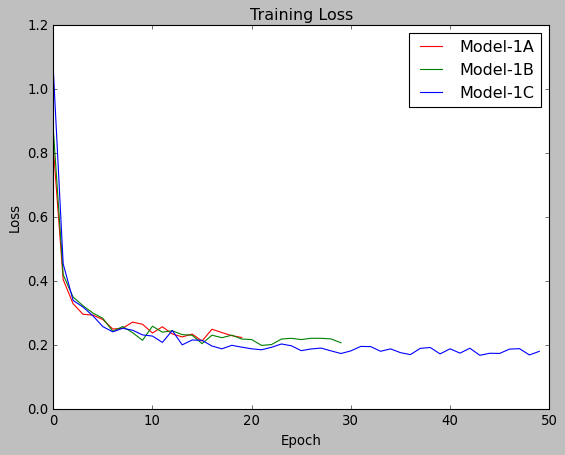

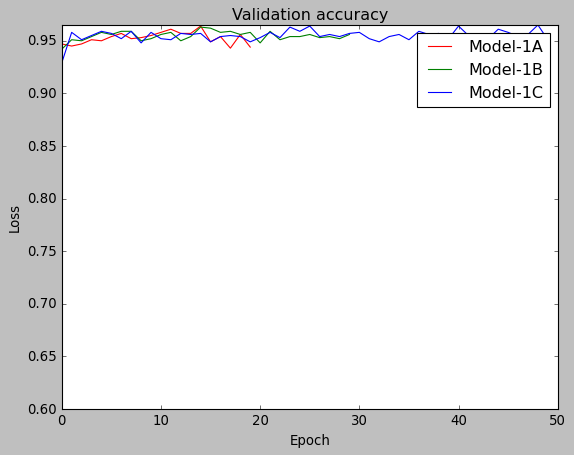

In [45]:
###Plotting this model with different hyperparameters:\



f, (ax1) = plt.subplots(1, 1)
ax1.plot(history1.history['loss'],color='red')
ax1.plot(history2.history['loss'],color='green')
ax1.plot(history3.history['loss'],color='blue')
ax1.set(title='Training Loss',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0)
ax1.legend(['Model-1A','Model-1B','Model-1C'])
plt.show()


f, (ax1) =plt.subplots(1, 1) 
ax1.plot(history1.history['val_accuracy'],color='red')
ax1.plot(history2.history['val_accuracy'],color='green')
ax1.plot(history3.history['val_accuracy'],color='blue')
ax1.set(title='Validation accuracy',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0.6)
ax1.legend(['Model-1A','Model-1B','Model-1C'])
plt.show()

# Adding more layers & changing the learning rate

In [46]:
### MODEL 2A

### 2nd model MODEL 2-A with a new learning rate

model2A = models.Sequential(name='MODEL-2A')
# adding the input layer
model2A.add(layers.Input(shape=(X_train.shape[1],)))

#adding three dense layers
model2A.add(layers.Dense(128, activation='relu'))
model2A.add(layers.Dropout(0.5))
model2A.add(layers.Dense(64, activation='relu'))
model2A.add(layers.Dropout(0.5))
model2A.add(layers.Dense(32, activation='relu'))
model2A.add(layers.Dropout(0.5))

#Output layer
model2A.add(layers.Dense(6, activation='softmax'))

opt_2 = Adam(learning_rate=0.01)

#Compiling the model
model2A.compile(optimizer= opt_2,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()


#Model Training 
history4 = model2A.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=20,batch_size=50,validation_data=(X_val_scaled, y_val_encoded))


y_pred1 = np.argmax(model2A.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_2A = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_2A:.3f} seconds")

# Accuracy Score
Accuracy_2A = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_2A}')

model2A.summary()

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4940 - loss: 1.2829 - val_accuracy: 0.9410 - val_loss: 0.2182
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.4690 - val_accuracy: 0.9480 - val_loss: 0.1643
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.3692 - val_accuracy: 0.9480 - val_loss: 0.1726
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9085 - loss: 0.3308 - val_accuracy: 0.9420 - val_loss: 0.1775
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8950 - loss: 0.3450 - val_accuracy: 0.9460 - val_loss: 0.1760
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.3296 - val_accuracy: 0.9450 - val_loss: 0.1790
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9188 - loss: 0.2886 - val_accuracy: 0.9530 - val_loss: 0.1744
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.3147 - val_accuracy: 0.9460 - val_loss:

Model: "MODEL-2A"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)               │      3,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_10 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_11 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_8 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 41,204 (160.96 KB)

 Trainable params: 13,734 (53.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,470 (107.31 KB)

In [47]:
### MODEL 2B

### 2nd model MODEL 2-B

model2B = models.Sequential(name='MODEL-2B')
# adding the input layer
model2B.add(layers.Input(shape=(X_train.shape[1],)))

#adding three dense layers
model2B.add(layers.Dense(128, activation='relu'))
model2B.add(layers.Dropout(0.5))
model2B.add(layers.Dense(64, activation='relu'))
model2B.add(layers.Dropout(0.5))
model2B.add(layers.Dense(32, activation='relu'))
model2B.add(layers.Dropout(0.5))

#Output layer
model2B.add(layers.Dense(6, activation='softmax'))

opt_2 = Adam(learning_rate=0.01)

#Compiling the model
model2B.compile(optimizer= opt_2,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()


#Model Training 
history5 = model2B.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=30,batch_size=50,validation_data=(X_val_scaled, y_val_encoded))


y_pred1 = np.argmax(model2B.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_2B = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_2B:.3f} seconds")

# Accuracy Score
Accuracy_2B = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_2B}')

model2B.summary()

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4582 - loss: 1.3569 - val_accuracy: 0.9330 - val_loss: 0.2183
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8557 - loss: 0.4707 - val_accuracy: 0.9420 - val_loss: 0.1958
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8907 - loss: 0.3930 - val_accuracy: 0.9540 - val_loss: 0.1537
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.3212 - val_accuracy: 0.9450 - val_loss: 0.1707
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.3790 - val_accuracy: 0.9560 - val_loss: 0.1513
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9108 - loss: 0.3165 - val_accuracy: 0.9470 - val_loss: 0.1790
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9067 - loss: 0.3245 - val_accuracy: 0.9540 - val_loss: 0.1803
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.3010 - val_accuracy: 0.9540 - val_loss:

Model: "MODEL-2B"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)               │      3,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_9 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_14 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_10 (Dropout)            │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_15 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_11 (Dropout)            │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_16 (Dense)                │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 41,204 (160.96 KB)

 Trainable params: 13,734 (53.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,470 (107.31 KB)

In [48]:
### MODEL 2C

### 2nd model MODEL 2-C

model2C = models.Sequential(name='MODEL-2C')
# adding the input layer
model2C.add(layers.Input(shape=(X_train.shape[1],)))

#adding three dense layers
model2C.add(layers.Dense(128, activation='relu'))
model2C.add(layers.Dropout(0.5))
model2C.add(layers.Dense(64, activation='relu'))
model2C.add(layers.Dropout(0.5))
model2C.add(layers.Dense(32, activation='relu'))
model2C.add(layers.Dropout(0.5))

#Output layer
model2C.add(layers.Dense(6, activation='softmax'))

opt_2 = Adam(learning_rate=0.01)

#Compiling the model
model2C.compile(optimizer= opt_2,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Data preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


# Record start time
start_time = time.time()


#Model Training 
history6 = model2C.fit(X_train_scaled, y_train_encoded, validation_split=0.20,epochs=50,batch_size=200,validation_data=(X_val_scaled, y_val_encoded))


y_pred1 = np.argmax(model2C.predict(X_val_scaled), axis=-1)

 
y_pred_labels1 = label_encoder.inverse_transform(y_pred1)

training_time_2C = time.time() - start_time


##Training Time 
print(f"Training Time: {training_time_2C:.3f} seconds")

# Accuracy Score
Accuracy_2C = accuracy_score(y_val, y_pred_labels1)
print(f'Test Accuracy: {Accuracy_2C}')

model2C.summary()

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3057 - loss: 1.6662 - val_accuracy: 0.8930 - val_loss: 0.5264
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7429 - loss: 0.7496 - val_accuracy: 0.9470 - val_loss: 0.1822
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.4593 - val_accuracy: 0.9520 - val_loss: 0.1607
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.3504 - val_accuracy: 0.9540 - val_loss: 0.1441
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9151 - loss: 0.3128 - val_accuracy: 0.9610 - val_loss: 0.1411
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9072 - loss: 0.3015 - val_accuracy: 0.9540 - val_loss: 0.1476
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9043 - loss: 0.3284 - val_accuracy: 0.9550 - val_loss: 0.1480
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9211 - loss: 0.2594 - val_accuracy: 0.9510 - val_loss

Model: "MODEL-2C"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)               │      3,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_12 (Dropout)            │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_18 (Dense)                │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_13 (Dropout)            │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_19 (Dense)                │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_14 (Dropout)            │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_20 (Dense)                │ (None, 6)                 │        198 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 41,204 (160.96 KB)

 Trainable params: 13,734 (53.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,470 (107.31 KB)

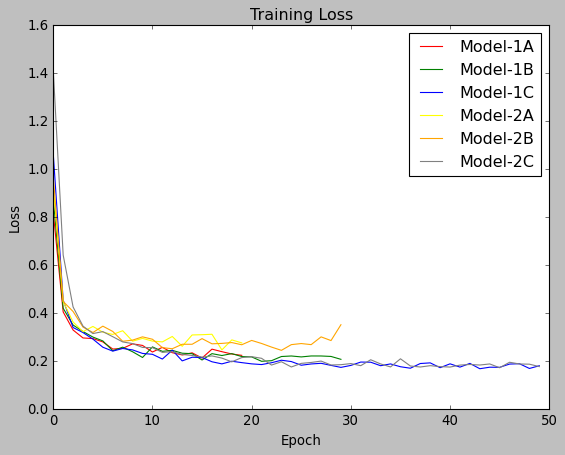

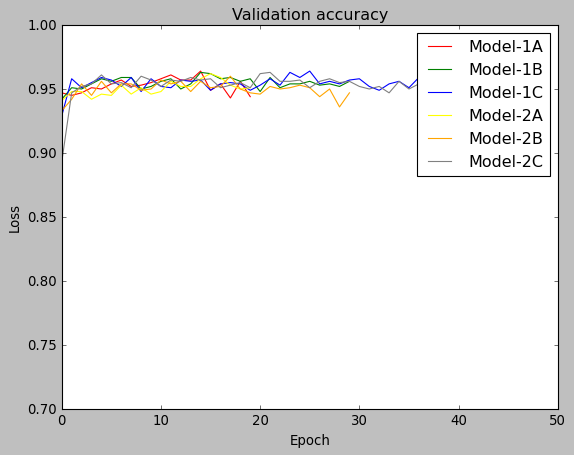

In [49]:
###Plotting this model with different hyperparameters:\



f, (ax1) = plt.subplots(1, 1)
ax1.plot(history1.history['loss'],color='red')
ax1.plot(history2.history['loss'],color='green')
ax1.plot(history3.history['loss'],color='blue')
ax1.plot(history4.history['loss'],color='yellow')
ax1.plot(history5.history['loss'],color='orange')
ax1.plot(history6.history['loss'],color='grey')

ax1.set(title='Training Loss',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0)
ax1.legend(['Model-1A','Model-1B','Model-1C','Model-2A','Model-2B','Model-2C'])
plt.show()


f, (ax1) =plt.subplots(1, 1) 
ax1.plot(history1.history['val_accuracy'],color='red')
ax1.plot(history2.history['val_accuracy'],color='green')
ax1.plot(history3.history['val_accuracy'],color='blue')
ax1.plot(history4.history['val_accuracy'],color='yellow')
ax1.plot(history5.history['val_accuracy'],color='orange')
ax1.plot(history6.history['val_accuracy'],color='grey')
ax1.set(title='Validation accuracy',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0.7)
ax1.set_ylim(top=1.0)
ax1.legend(['Model-1A','Model-1B','Model-1C','Model-2A','Model-2B','Model-2C'])
plt.show()

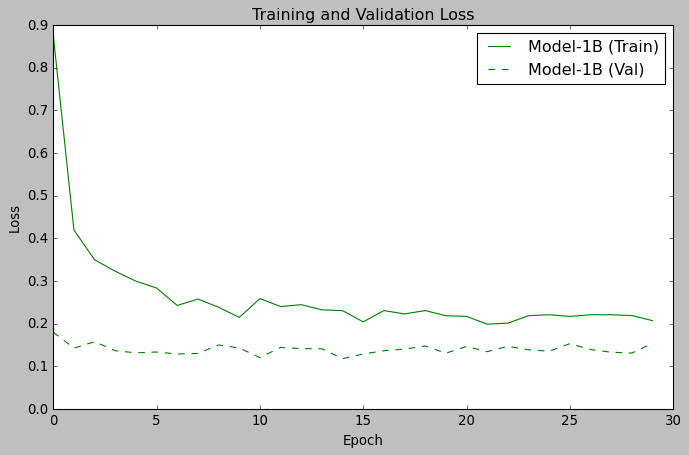

In [50]:



import matplotlib.pyplot as plt



# Create a figure and axis
f, (ax1) = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size as needed

# Plot the training loss for each model
#ax1.plot(history1.history['loss'], color='red', label='Model-1A (Train)')
ax1.plot(history2.history['loss'], color='green', label='Model-1B (Train)')
#ax1.plot(history3.history['loss'], color='blue', label='Model-1C (Train)')
#ax1.plot(history4.history['loss'], color='yellow', label='Model-2A (Train)')
#ax1.plot(history5.history['loss'], color='orange', label='Model-2B (Train)')
#ax1.plot(history6.history['loss'], color='grey', label='Model-2C (Train)')

# Plot the validation loss for each model
#ax1.plot(history1.history['val_loss'], linestyle='dashed', color='red', label='Model-1A (Val)')
ax1.plot(history2.history['val_loss'], linestyle='dashed', color='green', label='Model-1B (Val)')
#ax1.plot(history3.history['val_loss'], linestyle='dashed', color='blue', label='Model-1C (Val)')
#ax1.plot(history4.history['val_loss'], linestyle='dashed', color='yellow', label='Model-2A (Val)')
#ax1.plot(history5.history['val_loss'], linestyle='dashed', color='orange', label='Model-2B (Val)')
#ax1.plot(history6.history['val_loss'], linestyle='dashed', color='grey', label='Model-2C (Val)')

# Set labels and title
ax1.set(title='Training and Validation Loss', xlabel='Epoch', ylabel='Loss')
ax1.set_ylim(bottom=0)

# Show legend
ax1.legend()

# Show the plot
plt.show()


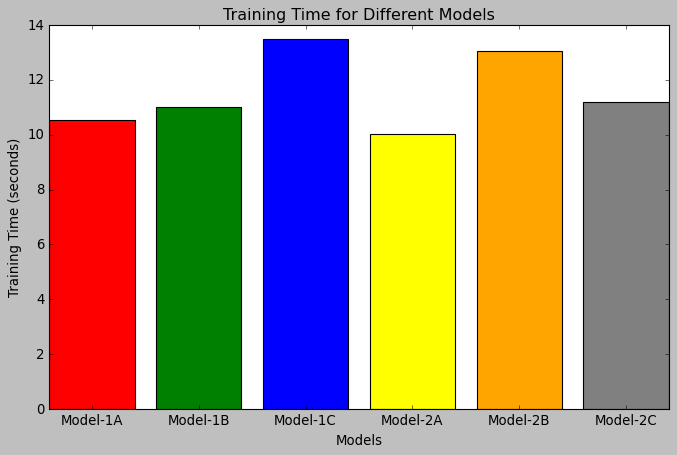

In [51]:
import matplotlib.pyplot as plt

# Model names and corresponding training times
model_names = ['Model-1A', 'Model-1B', 'Model-1C', 'Model-2A', 'Model-2B', 'Model-2C']
training_times = [training_time_1A, training_time_1B, training_time_1C, training_time_2A, training_time_2B, training_time_2C]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_times, color=['red', 'green', 'blue', 'yellow', 'orange', 'grey'])

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Different Models')

# Show the plot
plt.show()
